# Electric Field Lines

As we discussed in class, there are two ways to visualize the electric field. One is to draw the field vectors, and the other is to draw the field lines. 

In this first section, we will draw the field lines for a point charge and a dipole.

## Point Charge

The electric field for a point charge is given by

$$\vec{E} = k_e \frac{q}{r^2}\hat{r}$$

where $\hat{r}$ is the unit vector pointing from the charge to the point in space where we are calculating the field.

The field lines are drawn by calculating the field at a large number of points in space and then drawing a line that is tangent to the field at each point.

The following code calculates the field at 100 points in the x-y plane and then draws the field lines.

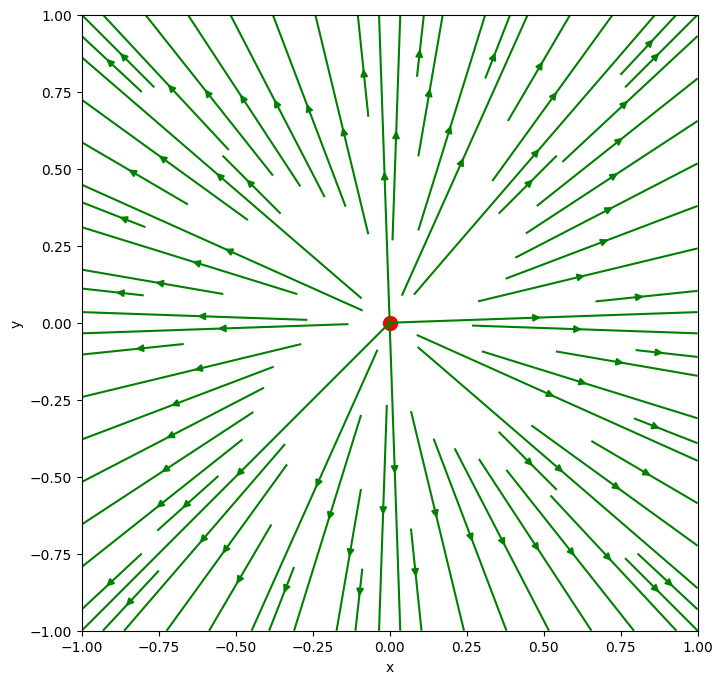

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ke = 8.99e9 # Coulomb constant
q = 1e-9 # Charge in nC

# Calculate the field at 100 points in the x-y plane

# Set up the grid
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
X,Y = np.meshgrid(x,y)

# Calculate the field at each point
r = np.sqrt(X**2 + Y**2)
Ex = ke*q*X/r**3
Ey = ke*q*Y/r**3

# Draw the field lines
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.streamplot(X,Y,Ex,Ey, color='g')

# Draw the charge
ax.scatter([0],[0], s=100, c='r')
ax.add_artist(plt.Circle((0,0), 0.01, color='r'))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_aspect('equal')
plt.show()

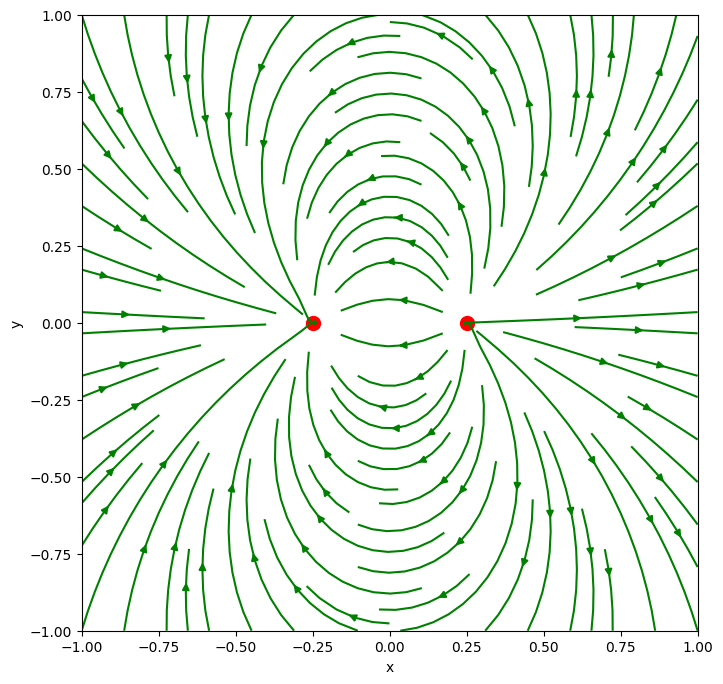

In [2]:
# Electric Dipols
#
# Charge -q at (0,-d/2)
# Charge +q at (0,+d/2)
#
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
X,Y = np.meshgrid(x,y)

d = 0.5
q1 = -1e-9
q2 = 1e-9

r1 = np.sqrt((X+d/2)**2 + (Y)**2)
r2 = np.sqrt((X-d/2)**2 + (Y)**2)

Ex = ke*(q1*(X+d/2)/r1**3 + q2*(X-d/2)/r2**3)
Ey = ke*(q1*Y/r1**3 + q2*Y/r2**3)

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.streamplot(X,Y,Ex,Ey, color='g')

# Draw the charges
ax.scatter([d/2,-d/2],[0,0], s=100, c='r')
ax.add_artist(plt.Circle((d/2,0), 0.01, color='r'))
ax.add_artist(plt.Circle((-d/2,0), 0.01, color='r'))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_aspect('equal')
plt.show()

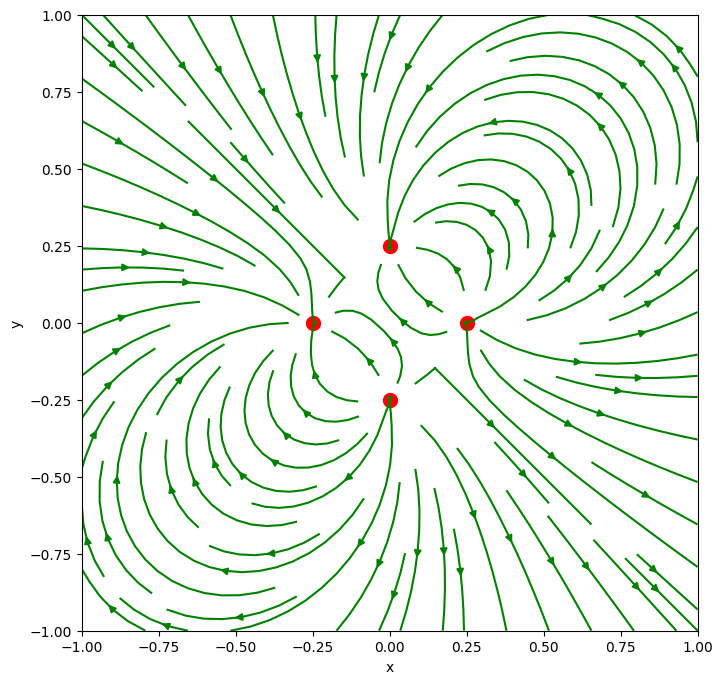

In [3]:
# Electric Quadrupole

# Charge -q at (0,-d/2)
# Charge +q at (0,+d/2)
# Charge +q at (-d/2,0)
# Charge -q at (+d/2,0)

x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
X,Y = np.meshgrid(x,y)

d = 0.5
q1 = -1e-9
q2 = 1e-9
q3 = 1e-9
q4 = -1e-9

r1 = np.sqrt((X+d/2)**2 + (Y)**2)
r2 = np.sqrt((X-d/2)**2 + (Y)**2)
r3 = np.sqrt((X)**2 + (Y+d/2)**2)
r4 = np.sqrt((X)**2 + (Y-d/2)**2)

Ex = ke*(q1*(X+d/2)/r1**3 + q2*(X-d/2)/r2**3 + q3*X/r3**3 + q4*X/r4**3)
Ey = ke*(q1*Y/r1**3 + q2*Y/r2**3 + q3*(Y+d/2)/r3**3 + q4*(Y-d/2)/r4**3)

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.streamplot(X,Y,Ex,Ey, color='g')

# Draw the charges
ax.scatter([d/2,-d/2,0,0],[0,0,d/2,-d/2], s=100, c='r')
ax.add_artist(plt.Circle((d/2,0), 0.01, color='r'))
ax.add_artist(plt.Circle((-d/2,0), 0.01, color='r'))
ax.add_artist(plt.Circle((0,d/2), 0.01, color='r'))
ax.add_artist(plt.Circle((0,-d/2), 0.01, color='r'))


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_aspect('equal')
plt.show()

In [4]:
def DrawELines(Q, XQ, YQ, xl=-1, xh=1, yl=-1, yh=1):
    # Q is a list of charges
    # XQ and YQ are positions of the charges
    # Calculate the field at 100 points in the x-y plan
    # xl, xh, yl, yh, are the plot limits)
    
    n_charges = len(Q)
    
    # Set up the grid
    x = np.linspace(xl,xh,100)
    y = np.linspace(yl,yh,100)
    X,Y = np.meshgrid(x,y)
    
    Ex = np.zeros((100,100))
    Ey = np.zeros((100,100))
    
    for i in range(n_charges):
        r = np.sqrt((X-XQ[i])**2 + (Y-YQ[i])**2)
        Ex += ke*Q[i]*(X-XQ[i])/r**3
        Ey += ke*Q[i]*(Y-YQ[i])/r**3

    # Draw the field lines
    fig, ax = plt.subplots(1,1, figsize=(8,8))
    ax.streamplot(X,Y,Ex,Ey, color='g')

    # Draw the charges
    for i in range(n_charges):
        ax.scatter([XQ[i]],[YQ[i]], s=100, c='r')
        ax.add_artist(plt.Circle((XQ[i],YQ[i]), 0.01, color='r'))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(xl,xh)
    ax.set_ylim(yl,yh)

    plt.show()

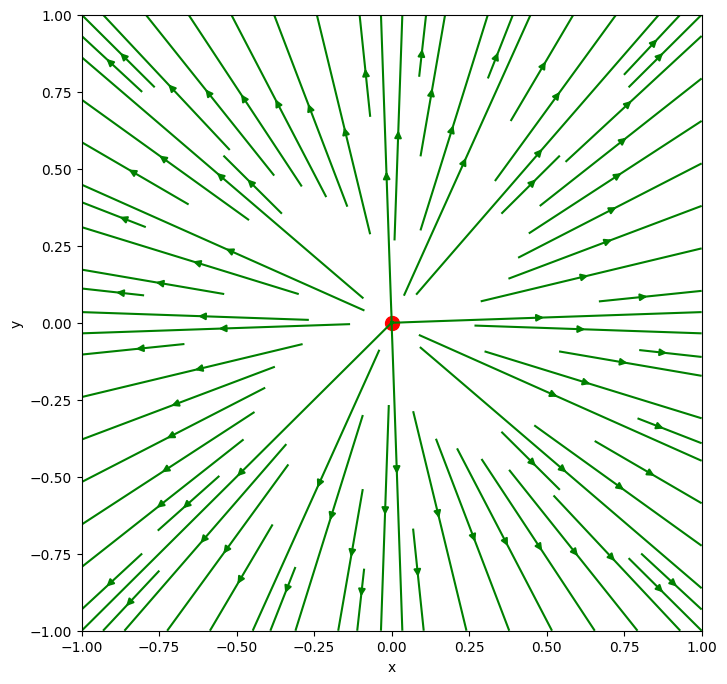

In [5]:
# Point charge at (0,0)

Q = [1e-9]
XQ = [0]
YQ = [0]

DrawELines(Q, XQ, YQ)

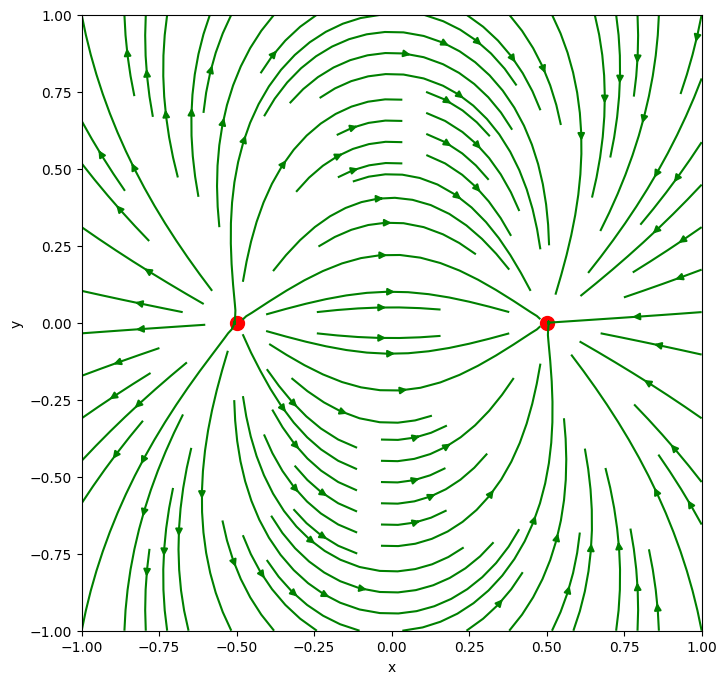

In [6]:
# Electric Dipole

Q = [1e-9, -1e-9]
XQ = [-0.5,0.5]
YQ = [0.0,0.0]

DrawELines(Q, XQ, YQ)

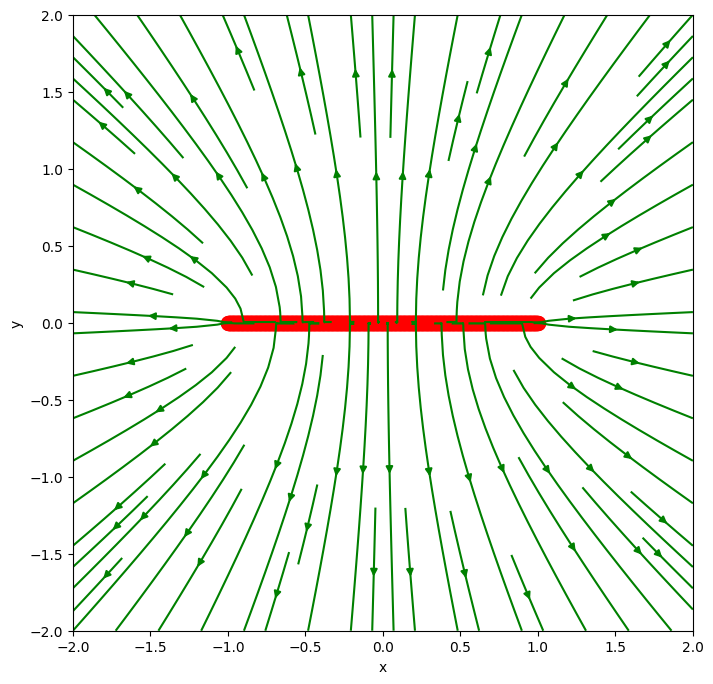

In [7]:
# Line of charge

Q = [1e-9]*1000
XQ = np.linspace(-1,1,1000)
YQ = np.zeros(1000)

DrawELines(Q, XQ, YQ, -2, 2, -2, 2)